## Principal Component Analyis

Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables.  
Each of the principal components is chosen in such a way so that it would describe most of the still available variance  
And all these principal components are orthogonal to each other.  
In all principal components first principal component has maximum variance.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split , StratifiedKFold 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB ,MultinomialNB ,BernoulliNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,f1_score
from sklearn.preprocessing import OneHotEncoder
from prettytable import PrettyTable

In [2]:
from sklearn.datasets import load_breast_cancer 
  
# instantiating 
cancer = load_breast_cancer() 
  
# creating dataframe 

  
# checking head of dataframe 



In [3]:
y = pd.DataFrame(cancer['target'])
X =pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 


In [4]:
cnt = y[0].value_counts()
print('y-count\n',cnt) , X.shape

y-count
 1    357
0    212
Name: 0, dtype: int64


(None, (569, 30))

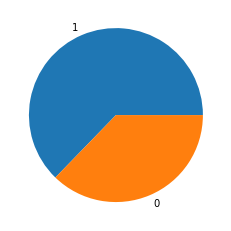

In [5]:
plt.pie(cnt,labels = [1,0])
plt.show()

In [6]:
# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
# fitting 
scalar.fit(X) 
X = scalar.transform(X) 

X[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

# Oversampling unbalanced Data

In [7]:
from imblearn.over_sampling import SMOTE, ADASYN
X, y = SMOTE().fit_resample(X, y[0])
# print(sorted(Counter(y_resampled).items()))

Using TensorFlow backend.
/home/hyper/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hyper/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hyper/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hyper/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [8]:
y = pd.DataFrame(y)
cnt = y[0].value_counts()
cnt

1    357
0    357
Name: 0, dtype: int64

# PCA

In [9]:
pca = PCA(n_components=2)
X = pca.fit(X).transform(X)

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [0.46624714 0.19001744]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
# X_test
cnt = y_test[0].value_counts()
cnt

(535, 2) (535, 1)
(179, 2) (179, 1)


0    90
1    89
Name: 0, dtype: int64

In [11]:
import xgboost as xgb

In [14]:
%%capture cap --no-stderr
for i in np.around((np.arange (.1,1,.1)),decimals=1):
    for j in np.around((np.arange (.1,1,.1)),decimals=1):
        model= xgb.XGBClassifier(learning_rate=j,random_state=1,loss = 'exponential',subsample=0.9,gamma=i)
        model.fit(X_train, y_train)
        train = round(model.score(X_train, y_train),2)
        test = round(model.score(X_test,y_test),2)
        predicted_labels = model.predict(X_test)
        Accuracy = accuracy_score(y_test, predicted_labels)
        F1score = f1_score(y_test, predicted_labels)
        Recall = recall_score(y_test, predicted_labels)
        Precision = precision_score(y_test, predicted_labels)
        t = PrettyTable(['gamma', 'Learningrate','Train_score','Test_score','Accuracy','F1score','Recall','Precision'])
        t.add_row([i, j,train,test,Accuracy,F1score,Recall,Precision])
#         t.add_row(['j', j])
        print(t)
with open('output.txt', 'w') as f:
        f.write(cap.stdout)

In [13]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.9,
              learning_rate=0.9, loss='exponential', max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.9, verbosity=1)>